# Comparing K-means , Agglomerative and DBSCAN Clusters

# load Libraries

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans, KMeans
import seaborn as sns

from sklearn.metrics.cluster import contingency_matrix,adjusted_rand_score
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Loading Dataset

In [ ]:
df = pd.read_csv('../input/drug-classification/drug200.csv')

df.head(3)

# Encode catagorial columns

In [ ]:
df["Cholesterol"].unique()
#array(['HIGH', 'NORMAL'], dtype=object)
df["BP"].unique()
#array(['HIGH', 'LOW', 'NORMAL'], dtype=object)
df["Drug"].unique()
#array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

lvl={"HIGH":3,"NORMAL":2,"LOW":1}
df['Cholesterol']= [lvl[i] for i in df['Cholesterol'] ]
df['BP']= [lvl[i] for i in df['BP'] ]

Drug={"drugA":1,"drugB":2,"drugC":3,"drugX":4,"DrugY":5}
df['Drug']= [Drug[i] for i in df['Drug'] ]

Drug={"F":1,"M":2}
df['Sex']= [Drug[i] for i in df['Sex'] ]

#df = df[df['Drug'] <3]
len(df)
df.head(3)

# split features and label column

In [ ]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1:]

# visualizing Data and Correlation

In [ ]:

import seaborn as sns 
# generating correlation heatmap 
sns.heatmap(df.corr(), annot = True) 
# posting correlation heatmap to output console  
plt.show() 

sns.pairplot(df,hue='Drug')

#sns.stripplot(x=list(X["Na_to_K"]),y=list(X["Cholesterol"]),hue=list(Y["Drug"]),jitter=True)

# 1- Partition-based clustering -  k-mean 
Our dataset have 5 classes so I target K-means to produce 5 clusters

In [ ]:
k_means = KMeans(init='k-means++', n_clusters=5)
k_means.fit(X)
y_pred=k_means.predict(X)

In [ ]:
cont_m=contingency_matrix(y_pred,Y)
cont_m
#adjusted_rand_score


# Evaluate K-means 

In [ ]:
puirty=np.sum(np.max(cont_m,axis=1))/np.sum(cont_m)
rand_score=adjusted_rand_score(list(y_pred),list(Y.iloc[:,0]))
print("puirty:"+str(puirty))
print("rand_score:"+str(rand_score))

# 2- Hierarchical clustering : Agglomerative 


In [ ]:
from scipy.cluster.hierarchy import linkage,dendrogram,cut_tree
from matplotlib import pyplot as plt

Z= linkage(X,"single")

#Cute Tree used to specify how many cluster I want 
cutree = cut_tree(Z, n_clusters=[5])


fig = plt.figure(figsize=(10, 5))
#dn = dendrogram(Z,truncate_mode='lastp',p=6,    leaf_font_size=12.,show_contracted=True)

fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=5,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=2,
    max_d=4,  # plot a horizontal cut-off line
)
plt.show()

# Evaluate Hierarchical clustering

In [ ]:
cont_m=contingency_matrix(cutree[:,0],Y)
puirty=np.sum(np.max(cont_m,axis=1))/np.sum(cont_m)
rand_score=adjusted_rand_score(list(cutree[:,0]),list(Y.iloc[:,0]))
print("puirty:"+str(puirty))
print("rand_score:"+str(rand_score))


# 3- Density-based clustering: DBSCAN
density-based techniques are more efficient in arbitrary shaped clusters and outliers detection .
The main idea behind DBSCAN is that a point belongs to a cluster if it is close to many points from that cluster.



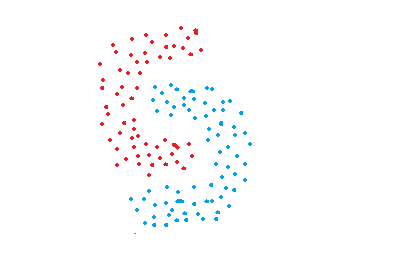

# loop to define eps value for 5 clusters
in Density-based clustering you can not predefine the numbers of clusters So I make loop to get 5 clusters

eps: The distance that specifies the neighborhoods. 
Two points are considered to be neighbors if the distance between them are less than or equal to eps.

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np

run=True
eps_val= 0.1

#loop to define eps value for 5 clusters
while run:
    eps_val =eps_val + 0.1
    clustering = DBSCAN(eps=eps_val, min_samples=2).fit(X)
    #print(clustering.labels_)
    cluster_count = len(set(clustering.labels_[clustering.labels_ != -1]))
    #print("N:"+str(cluster_count))
    outlairs = len(clustering.labels_[clustering.labels_ == -1])
    #print("O:"+str(outlairs))
    
    if cluster_count ==5:
        print("eps_val:"+str(eps_val) + " outlairs:"+str(outlairs) + " cluster_count:"+str(cluster_count))
    if (cluster_count ==5 and outlairs== 0) or round(eps_val)==10:
        run=False
    


In [ ]:
clustering = DBSCAN(eps=5.1999999999999975, min_samples=2).fit(X)
cluster_count = len(set(clustering.labels_))

cont_m=contingency_matrix(clustering.labels_,Y)
puirty=np.sum(np.max(cont_m,axis=1))/np.sum(cont_m)
rand_score=adjusted_rand_score(list(clustering.labels_),list(Y.iloc[:,0]))
print("puirty:"+str(puirty))
print("rand_score:"+str(rand_score))

# results 

# Results Show that K-mean gives best results for my Dataset


1.  K-means
    *     puirty:0.51
    *     rand_score:0.06510626450680837


2. Agglomerative
    * puirty:0.455
    * rand_score:-0.06899522570656587



3. DBSCAN
    * puirty:0.455
    * rand_score:-0.0703785243555056

